In [40]:
# Importing all the required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [41]:
# Answer 1
bank_df = pd.read_csv('bank.csv')

In [42]:
# Confirming that the data is loaded correctly
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# Answer 2
bank_df.shape

(10000, 14)

In [44]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
# The dataset has 10000 rows and 14 columns or attributes
# Surname, Geography and Gender will have to be processed as they are object/string values

In [46]:
# Answer 3
# Printing the number of unique entries of each attribute
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [47]:
# Dropping RowNumber and CustomerId as they are unique for every row in the dataset (Number of entries given by nunique() 
# is equal to the number of rows in the dataset)
bank_df = bank_df.drop(['RowNumber', 'CustomerId'], axis=1)

In [48]:
# Dropping Surname as it is a string with ~3000 unique values and no relation with target variable
bank_df = bank_df.drop(['Surname'], axis=1)

In [49]:
# Confirming that the columns are dropped correctly
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Checking for null values
bank_df.isnull().values.any()

False

In [51]:
# Answer 4
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [52]:
# It shows 9 out of 11 (after dropping 3 from the dataset) columns only
# Gender and Geography are missing as they are strings
# The rest of the columns have valid values
# CreditScore, EstimatedSalary seem to have a near-normal distribution as mean ~ median
# Age is slighly skewed to the right
# Tenure is almost normally distributed
# Balance is skewed to the left as mean << median, i.e. there are more people with lower account balance
# NumOfProducts - More than half the people use 1 product, rest use 2/3/4
# HasCrCard, IsActiveMember have slighly more 1s than 0s, as mean > 0.5 and median = 1
# Exited is heavily skewed towards 0 as all quartiles are 0, the mean > 0 as some values are 1 (less than 25% of total)

In [53]:
# Answer 5
bank_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [54]:
# There are twice as many people from France as there are from Spain or Germany

In [55]:
bank_df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [56]:
# There are ~20% more males than females in the dataset

In [57]:
# Encoding categorical columns Geography and Gender
bank_df['Geography'] = pd.Categorical(bank_df['Geography']).codes
bank_df['Gender'] = pd.Categorical(bank_df['Gender']).codes

In [58]:
# Confirming that the columns are correctly encoded
bank_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


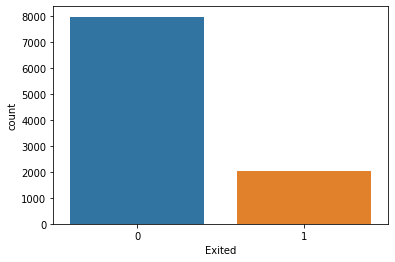

In [59]:
# Answer 6
sns.countplot(x=bank_df['Exited'])

In [60]:
# The data is skewed in the favour of those who DO NOT exit the bank (that is, class 0). The ratio is around 4:1.
# The model will be better at predicting 0s than 1s, as it has way more learning data on the same.

In [61]:
# Checking the exact counts
# As expected, less than 25% of total people have exited (20.37%) 
bank_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [62]:
# Answer 7

# Distinguishing feature and target set
X = bank_df.drop("Exited", axis=1)
y = bank_df["Exited"]

In [63]:
# Answer 8
test = 0.3

# Tried seed values ranging from 5-10% of data size, choosing 10% as it gives the minimum difference between training
# and testing accuracy.
# Taking 10% of the size of data set to get a good mix of training and testing data
seed = 1000

# Converting to numpy array 
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = seed)

In [64]:
# Answer 9

# Writing a function to scale both train and test data
def scale(train, test):
    scaler = StandardScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return scaled_train, scaled_test

X_train, X_test = scale(X_train, X_test)

In [65]:
# Answer 10

# Using k = 19 as it is identified as the optimal value by Answer 11 
KNN = KNeighborsClassifier(n_neighbors=19)

KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

# Printing model scores for train and test data
print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

# Printing confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

0.8491428571428571
0.8323333333333334
[[2322   45]
 [ 458  175]]


In [66]:
# Answer 11

# Trying k values from 1 to 30
myList = list(range(1,30))

# Picking out the odd values to avoid ties
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# Empty list to store accuracy scores
scores = []

# Perform accuracy metrics for values from 1,3,5....29
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

# Changing to misclassification error for an elbow plot
MSE = [1 - x for x in scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


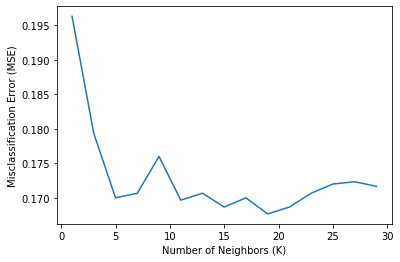

In [67]:
# Plotting k versus the misclassification errors
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Error (MSE)')
plt.show()

In [68]:
# Answer 12

# To determine the optimal number of clusters, we have to select the value of k for which the y co-ordinate (error) is
# minimum and from that point, the error seems to keep growing. The error is low at around k=5 but increases later on.
# The error is low again in the range of 10 to 20 where the lowest MSE is at k=19. Thus for the given data, we can conclude
# that the optimal number of clusters is 19.

In [69]:
# Answer 13

# Using max_depth as 4 as it gives the minimum difference (~0.5%) between training and test accuracies
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

# Printing model scores for train and test data
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

# Printing confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

0.8518571428571429
0.8463333333333334
[[2320   47]
 [ 414  219]]


In [70]:
# Answer 14
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_predict = log_model.predict(X_test)

# Printing model scores for train and test data
model_score_train = log_model.score(X_train, y_train)
print(model_score_train)
model_score_test = log_model.score(X_test, y_test)
print(model_score_test)

# Printing confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

0.8084285714285714
0.8043333333333333
[[2316   51]
 [ 536   97]]


C:\Users\Aayushi Somani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [385]:
# Answer 15
# Decision tree gives the best accuracy results among all three.
# Difference in accuracies in each model range from ~0.4% to ~1.7%, none of the models seem to be overfitting.
# Even though data is skewed in favour of class 0, decision tree model performs significantly better (True Positives-219) 
# than KNN (True Positives-175) and Logistic model (True Positive-97) in predicting class 1. 
# Thus, decision tree seems to be a better choice in this case when we have an imbalance in target data.
# Decision Tree performs better on class 1 but KNN performs slightly better than Decision Tree on class 0. We might also 
# want to consider using ensemble techniques in such a case by using both of these as base models.